In [3]:
!pip install lightgbm xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 1.6/56.8 MB 4.4 MB/s eta 0:00:13
   -- ------------------------------------- 2.9/56.8 MB 4.9 MB/s eta 0:00:11
   -- ------------------------------------- 4.2/56.8 MB 5.4 MB/s eta 0:00:10
   ---- ----------------------------------- 5.8/56.8 MB 5.9 MB/s eta 0:00:09
   ----- ---------------------------------- 7.6/56.8 MB 6.3 MB/s eta 0:00:08
   ------ --------------

Train Shape: (891, 12)
Test Shape: (418, 11)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


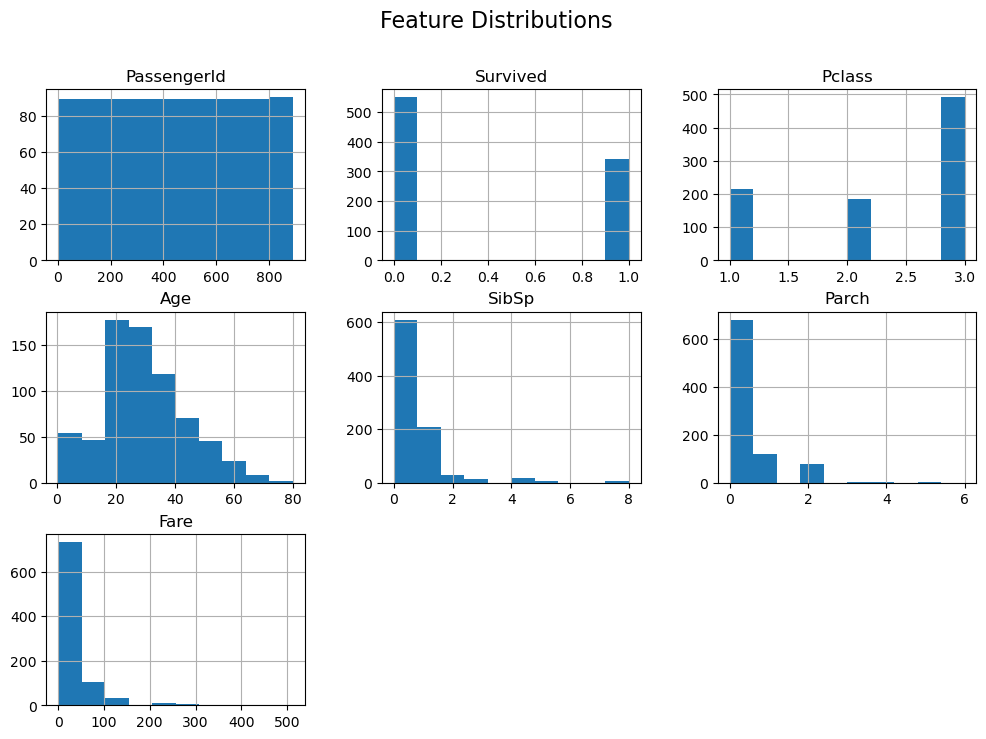

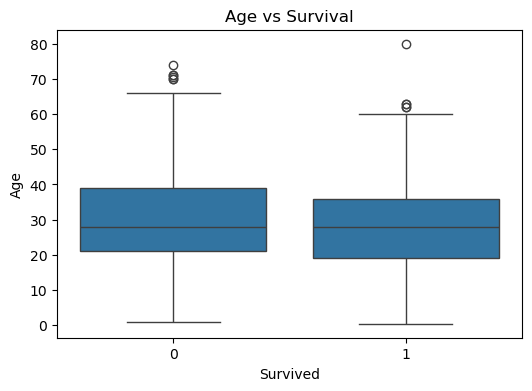

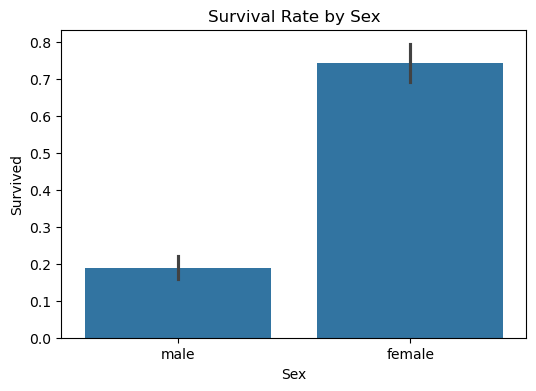

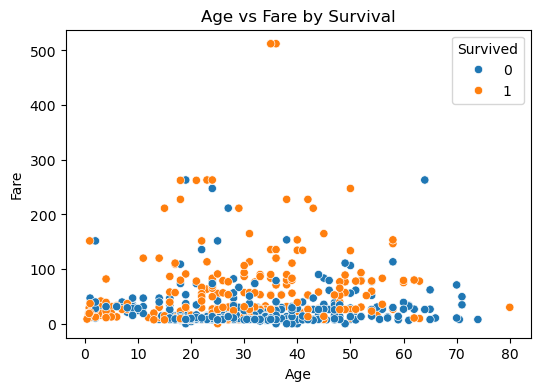

C:\Users\Sindu\AppData\Local\Temp\ipykernel_20720\2439070205.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Sindu\AppData\Local\Temp\ipykernel_20720\2439070205.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Sindu\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:39:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Performance:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Comparative Results:
       Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.798883   0.761905  0.695652  0.727273
1   XGBoost  0.810056   0.753623  0.753623  0.753623


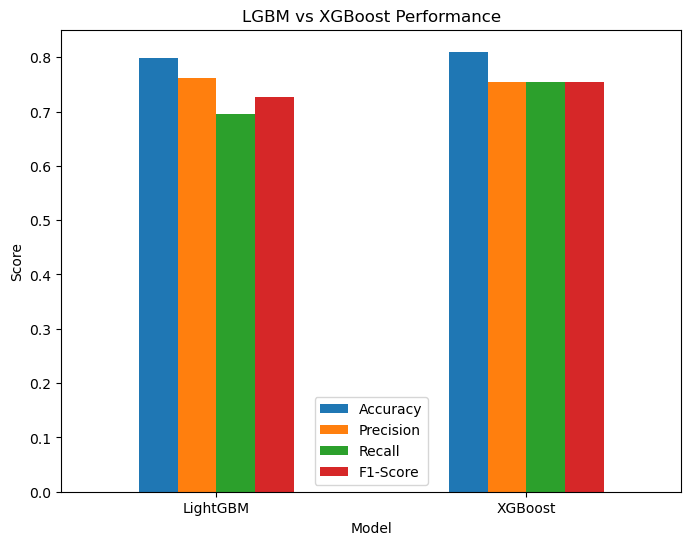

In [1]:
# =============================================
# Titanic Dataset - LightGBM vs XGBoost
# =============================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import lightgbm as lgb
import xgboost as xgb

# =============================================
# 1. Load Dataset
# =============================================
train_df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\XGBM & LGBM\\XGBM & LGBM\\Titanic_test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

# Preview
train_df.head()

# =============================================
# 2. Exploratory Data Analysis (EDA)
# =============================================

# Missing values
print("\nMissing Values:\n", train_df.isnull().sum())

# Histograms
train_df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplot for Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Age vs Survival")
plt.show()

# Barplot for Sex vs Survival
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

# Scatter plot: Age vs Fare colored by Survival
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train_df)
plt.title("Age vs Fare by Survival")
plt.show()

# =============================================
# 3. Data Preprocessing
# =============================================

# Impute missing Age with median, Embarked with mode
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

# Drop irrelevant columns
train_df = train_df.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =============================================
# 4. Model Building & Evaluation
# =============================================

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    return acc, prec, rec, f1

# ---- LightGBM ----
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_results = evaluate_model(lgb_model, X_test, y_test, "LightGBM")

# ---- XGBoost ----
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_results = evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# =============================================
# 5. Comparative Analysis
# =============================================

results_df = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [lgb_results[0], xgb_results[0]],
    "Precision": [lgb_results[1], xgb_results[1]],
    "Recall": [lgb_results[2], xgb_results[2]],
    "F1-Score": [lgb_results[3], xgb_results[3]]
})

print("\nComparative Results:\n", results_df)

# Bar plot comparison
results_df.set_index("Model").plot(kind="bar", figsize=(8,6))
plt.title("LGBM vs XGBoost Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
